In [130]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [29]:
IMAGE_SIZE=[224,224]

In [30]:
train_path="F:\crackdetection\train"
test_path="F:\crackdetection\test"

In [31]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [32]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [53]:
  # useful for getting number of output classes
folders = glob("F:/crackdetection/train/*")

In [54]:
len(folders)

2

In [55]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [57]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [58]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [59]:
from tensorflow.keras.layers import MaxPooling2D

In [60]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [61]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [62]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [63]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('F:/crackdetection/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 2 classes.


In [64]:
training_set

In [66]:
test_set = test_datagen.flow_from_directory('F:/crackdetection/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [68]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\B SHREE HARI\AppData\Local\Temp\ipykernel_15224\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
19/19 [==============================] - 26s 1s/step - loss: 1.2631 - accuracy: 0.5000 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 2/50
19/19 [==============================] - 18s 930ms/step - loss: 0.6523 - accuracy: 0.6200 - val_loss: 0.6492 - val_accuracy: 0.7550
Epoch 3/50
19/19 [==============================] - 20s 1s/step - loss: 0.4992 - accuracy: 0.7850 - val_loss: 0.6383 - val_accuracy: 0.7350
Epoch 4/50
19/19 [==============================] - 19s 1s/step - loss: 0.4043 - accuracy: 0.8333 - val_loss: 0.6264 - val_accuracy: 0.6850
Epoch 5/50
19/19 [==============================] - 18s 947ms/step - loss: 0.3885 - accuracy: 0.8483 - val_loss: 0.6150 - val_accuracy: 0.6550
Epoch 6/50
19/19 [==============================] - 18s 971ms/step - loss: 0.3679 - accuracy: 0.8550 - val_loss: 0.6274 - val_accuracy: 0.6700
Epoch 7/50
19/19 [==============================] - 19s 979ms/step - loss: 0.3619 - accuracy: 0.8683 - val_loss: 0.5629 - val_accuracy: 0.7000
Epoch 8/

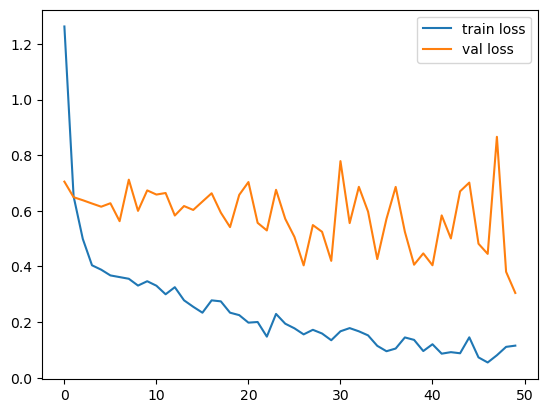

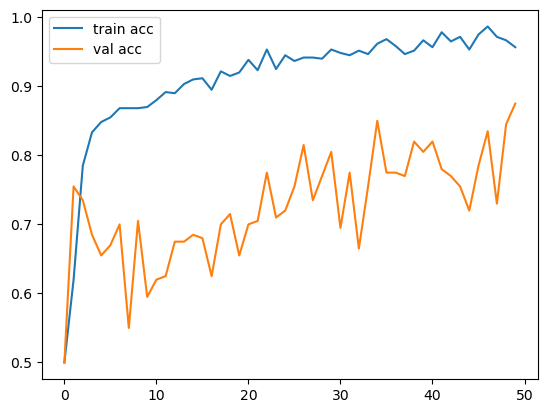

<Figure size 640x480 with 0 Axes>

In [69]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [70]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [71]:
y_pred = model.predict(test_set)

7/7 [==============================] - 1s 125ms/step


In [72]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [132]:
model=load_model('model_vgg19.h5')

In [135]:
image = load_img('F:/crackdetection/valid/Positive/IMG_9163_7_10.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
yhat = model.predict(image)

1/1 [==============================] - 0s 57ms/step


In [140]:
yhat

array([[0., 1.]], dtype=float32)